# Option Pricing Theory 

## What Are Options?

An **option** is a type of derivative that gives the holder the right (but not the obligation) to buy or sell an asset at a specific price (the **strike price**) before or at a certain date (the **expiration date**). The two main types of options are:

- **Call Option**: The right to buy an asset at the strike price.
- **Put Option**: The right to sell an asset at the strike price.

## Factors that effect Option Price

### 1) Time 
- options are like insurance - you have to keep paying to keep it 
- options have expiration dates: options with more time will be more expensive 
- time decay: as time passes an options value decays (exponentially)
- time decay is always happening (never stops)
- expiration dates can we weekly, monthly, quarterly

### 2) Stock Price
- for each stock theres multiple options at different prices - these are called the strike price
- strike price: predetermined price at which the shares of stock will be exchanged if the option is exercised 

- if the strike price is above the stock price, the option is out of the money (for call options)
- if the strike price is below the stock price, the option is in the money (for call options)

- if the strike price is above the stock price, the option is in the money (for put options)
- if the strike price is below the stock price, the option is out of the money (for put options)

- if an option is out of the money at expiration they are worth nothing 
- the further out of the money an option is the cheaper it is as it is unlikely to be of use to anyone 
- at expiration the in the money options are worth abs(stock - strike) - extrinsic value

### 3) Volatility  
- magnitide of the stocks price swings 
- more volotile means more risk
- more risk = more expensive 
- volatility can change 
- volatility is more predicable than stock price 

### Key Terms:
- **Strike Price**: The price at which the holder can buy or sell the asset.
- **Expiration Date**: The last date the option can be exercised.
- **Premium**: The price paid for the option.
- **European Option**: Can only be exercised at expiration.
- **American Option**: Can be exercised anytime up to expiration.

## Binomial Option Pricing

The model assumed that stock prices can only move up or down, like the branches of a tree

1) Divide the time to expiry into a large number of small time intervals or steps.
2) At each step, assume the stock price can only do one of two things:
    - Move up by a certain factor (u)
    - Move down by a certain factor (d)
3) The factors "u" and "d" are chosen based on the stock's volatility (how much its price tends to move around) and the length of each time step.
4) By following this up/down process over many steps, the model creates a binomial tree, a diagram depicting all the possible paths the stock price could take from now until the option expires. See the example below.


So, how does this help value an option? 
- we have to start at the end of the tree (the expiry date) and work backward.

- at expiration we'll know the worth of the option (strike price)
- we work back to the second last period - for each pair of up/down nodes calculate the expected value of the option in next period and take into account the probability of up and down movement 
- discounting the expected value back one period at the risk free interest rate gives the option value at each node in the present
- We repeat this process, working backward to the present until we have a single value at the starting node. This is the model's estimate of the fair value of the option today.
- By breaking down the time to expiry into many small steps and assuming the stock price can only move up or down by a certain amount at each step, the model creates a binomial tree that can approximate a wide range of possible price paths

## Binomial Option Pricing Specifics for Code

The **Binomial Option Pricing Model (BOPM)** is a method to price options by breaking the time to expiration into discrete steps. At each step, the asset's price can either go **up** or **down**, forming a binomial tree of possible prices.

### Steps in the Binomial Model:

1. **Price Tree Construction**:
   - Start with the current price.
   - At each step, the price moves up by a factor $u$ or down by a factor $d$, forming a tree of future prices.

2. **Calculate Payoffs at Expiration**:
   - At the end of the tree, compute the payoffs for each possible final price. For a **call option**, the payoff is $\max(S - K, 0)$, and for a **put option**, it is $\max(K - S, 0)$.

3. **Work Backwards to Find the Option Price**:
   - Starting from the last step, calculate the option value at each node by discounting the expected value of the future payoffs using the **risk-neutral probability**.

### Key Concepts:

- **Up and Down Factors**: 
  - The price moves up by a factor $u$ and down by $d$. These are calculated using the volatility $\sigma$ and time step length.
  - $u = e^{\sigma \sqrt{\Delta t}}$, $d = \frac{1}{u}$.
  
- **Risk-Neutral Probability**:
  - $p = \frac{e^{r \Delta t} - d}{u - d}$, where $r$ is the risk-free rate and $\Delta t$ is the time step.

- **Discount Factor**:
  - The discount factor is $e^{-r \Delta t}$.

# Implementataion in Python

## Libraries 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Binomial Pricing Function

In [15]:
def binomial_op_price(S0, K, T, r, sigma, N, type):
    
    dt = T/N # length of each time step 
    u = np.exp(sigma * np.sqrt(dt)) # up factor  
    d = 1/u # down factor 

    p = (np.exp(r * dt)-d)/(u-d)
    disc = np.exp((-r)*dt)

    # Price Tree
    price_tree = np.zeros([N + 1, N + 1])
    for i in range(N + 1):
        for j in range(i + 1):
            price_tree[j, i] = S0 * (d ** j) * (u ** (i - j))

    # Option Value
    op_values = np.zeros([N + 1, N + 1])
    if type == "C":
        op_values[:, N] = np.maximum(np.zeros(N + 1), price_tree[:, N] - K)
    elif type == "P":
        op_values[:, N] = np.maximum(np.zeros(N + 1), K - price_tree[:, N])
    else:
        print("Invalid option type. Please choose 'C' for Call or 'P' for Put")

    # Calculate Option Price at t=0
    for i in np.arange(N - 1, -1, -1):
        for j in np.arange(0, i + 1):
            op_values[j, i] = disc * (p * op_values[j, i + 1] + (1 - p) * op_values[j + 1, i + 1])

    return op_values[0, 0]



## Heatmap Function

In [16]:
# Heatmap Function 
def generate_heatmap(S_values, vol_values, K, T, r, N, type):
    option_prices = np.zeros((len(vol_values), len(S_values)))

    for i, sigma in enumerate(vol_values):
        for j, S in enumerate(S_values):
            option_prices[i, j] = np.round(binomial_op_price(S, K, T, r, sigma, N, type=type), 2)

    return option_prices

## Defining Parameters 

In [17]:
S = 100 # stock price 
sigma = 0.2 # volatility 
K = 99 # strike price 
T = 1 # time to expiration 
r = 0.06 # risk free rate 
N = 50 # number of steps 



call_price = binomial_op_price(S, K, T, r, sigma, N, type="C")
put_price = binomial_op_price(S, K, T, r, sigma, N, type="P")


print(call_price)
print(put_price)

11.546434850755071
4.781123675595922


## Generating Heatmaps 

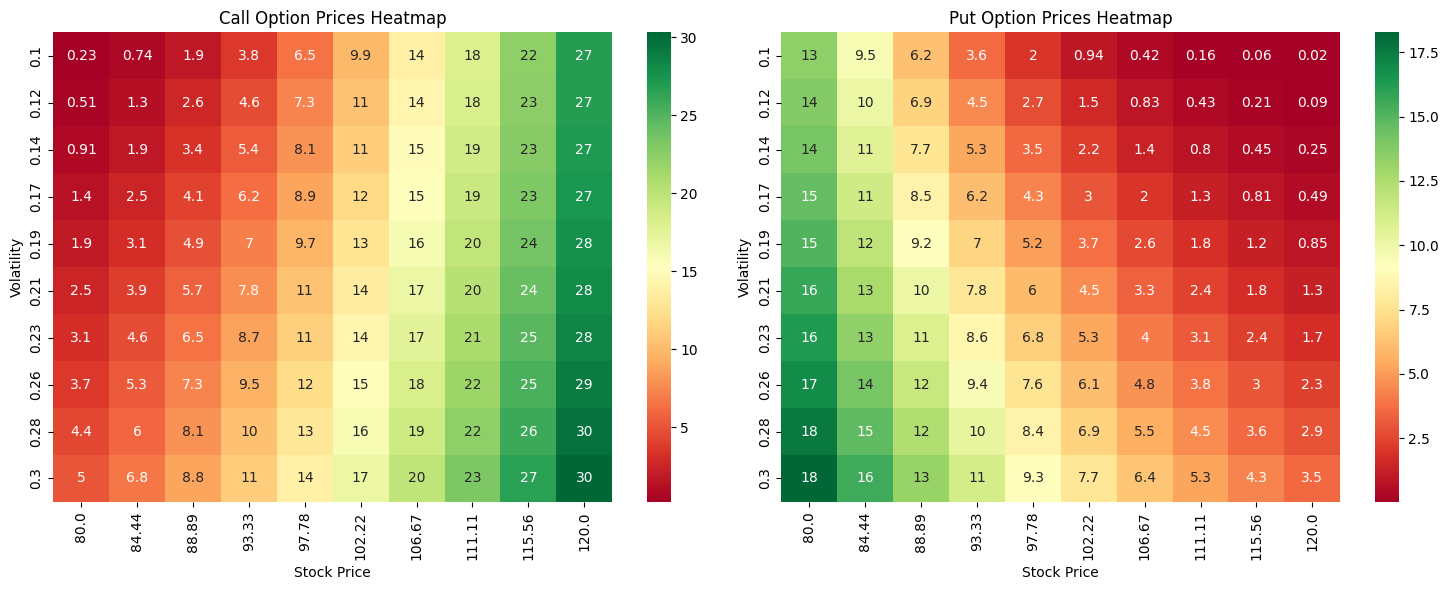

In [18]:
S_values = np.linspace(80, 120, 10)  # stock price range 
vol_values = np.linspace(0.1, 0.3, 10)  # volatility range


call_prices = generate_heatmap(S_values, vol_values, K, T, r, N, type="C")
put_prices = generate_heatmap(S_values, vol_values, K, T, r, N, type="P")


fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(call_prices, annot=True, xticklabels=np.round(S_values, 2), yticklabels=np.round(vol_values, 2), cmap="RdYlGn", ax=ax[0])
ax[0].set_title('Call Option Prices Heatmap')
ax[0].set_xlabel('Stock Price')
ax[0].set_ylabel('Volatility')

# Plot Put Option Heatmap
sns.heatmap(put_prices, annot=True, xticklabels=np.round(S_values, 2), yticklabels=np.round(vol_values, 2), cmap="RdYlGn", ax=ax[1])
ax[1].set_title('Put Option Prices Heatmap')
ax[1].set_xlabel('Stock Price')
ax[1].set_ylabel('Volatility')

plt.tight_layout()
plt.show()

plt.show()